Uniphase HeNe Datasheet: https://resource.lumentum.com/s3fs-public/technical-library-items/hnlh1100_ds_cl_ae.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

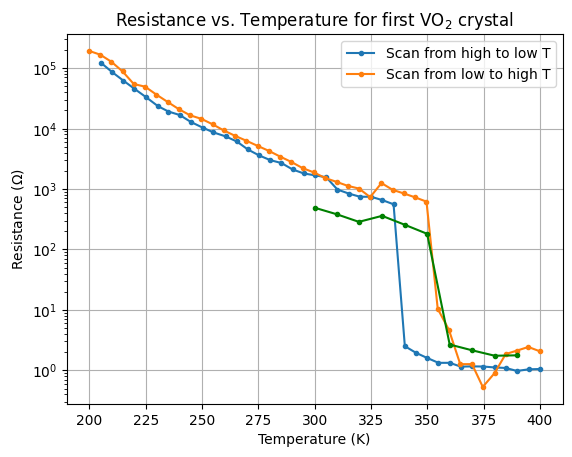

In [2]:
#It's okay to have one for both ways, as one can sort by time.
lowering_df_1 = pd.read_csv("resitance_VO2_(2).csv")
raising_df_1 = pd.read_csv("resitance_VO2_(3).csv")
other_df_1 = pd.read_csv("resitance_VO2.csv")

fig, ax = plt.subplots()
ax.plot(lowering_df_1["Temperature (K)"], -lowering_df_1["Bridge 2 Resistivity (Ohm)"], label='Scan from high to low T',marker='.')
ax.plot(raising_df_1["Temperature (K)"], -raising_df_1["Bridge 2 Resistivity (Ohm)"], label='Scan from low to high T',marker='.')
ax.plot(other_df_1["Temperature (K)"], -other_df_1["Bridge 2 Resistivity (Ohm)"],color='green',marker='.')
ax.set_yscale('log')
ax.legend()
ax.set_title('Resistance vs. Temperature for first $\mathrm{VO_2}$ crystal')
ax.set_ylabel('Resistance ($\Omega$)')
ax.set_xlabel('Temperature (K)')
ax.grid(visible=True)

Compare green and orange. Shouldn't they be the same? Not if the sample changed a lot. Prof. Du thinks the mount/contacts are definitely an issue, as contacts are certainly not great. Perhaps the crystal broke from the thermal stress, or from attempts to replace the wires. Also from now on, it's important to note things like maximum current, voltage, and power, and what sample you're using. Is it a heat/cold shock? Should we do the experiment slower? Maybe better samples and connections would solve our problems.

Anyway, enough of that lousy sample. We got a "thin film" of VO2 that was a lot thicker than I was actualy expecting. It looks like Van der Pauw might be feasible.

In [3]:
#To separate the portion of increasing T from that of decreasing T.
#MUST START WITH INCREASING THEN DECREASING (both monotonic) DF!
def separate_temperature_directions(time_sorted_df):
    x = 0
    while (time_sorted_df["Temperature (K)"][x] < time_sorted_df["Temperature (K)"][x+1]) and (x < len(time_sorted_df["Temperature (K)"])):
        x += 1
    ascending = time_sorted_df.iloc[:x]
    descending = time_sorted_df.iloc[x:]
    return ascending, descending

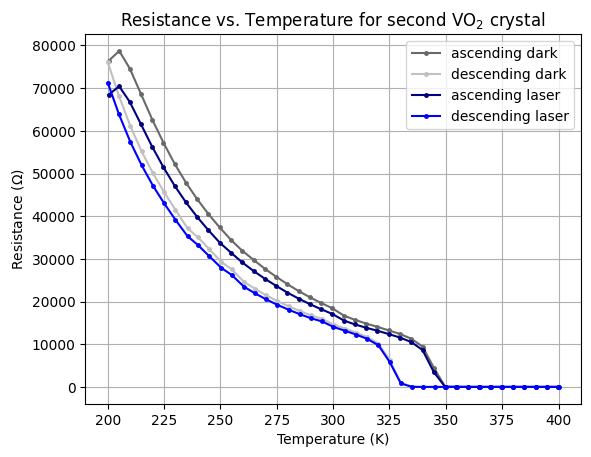

In [9]:
ascending_vo2_dark_2_df = pd.read_csv("VO2_wo_laser_24.csv").sort_values("Time Stamp (sec)")
descending_vo2_dark_2_df = pd.read_csv("VO2_wo_laser_42.csv").sort_values("Time Stamp (sec)")

#vo2_laserA_2_df = pd.read_csv("VO2_laser.csv").sort_values("Time Stamp (sec)")
#ascending_vo2_laserA_2_df, descending_vo2_laserA_2_df = separate_temperature_directions(vo2_laserA_2_df)

vo2_laserB_2_df = pd.read_csv("VO2_w_laser.csv").sort_values("Time Stamp (sec)")
ascending_vo2_laserB_2_df, descending_vo2_laserB_2_df = separate_temperature_directions(vo2_laserB_2_df)


fig, ax = plt.subplots()

ax.plot(ascending_vo2_dark_2_df["Temperature (K)"],ascending_vo2_dark_2_df["Bridge 2 Resistivity (Ohm)"],label="ascending dark",marker='.',ms=5,color='dimgray')
ax.plot(descending_vo2_dark_2_df["Temperature (K)"],descending_vo2_dark_2_df["Bridge 2 Resistivity (Ohm)"],label="descending dark",marker='.',ms=5,color='silver')

#ax.plot(ascending_vo2_laserA_2_df["Temperature (K)"],-ascending_vo2_laserA_2_df["Bridge 2 Resistivity (Ohm)"],label="ascending laser A",marker='.',ms=5,color='brown')
#ax.plot(descending_vo2_laserA_2_df["Temperature (K)"],-descending_vo2_laserA_2_df["Bridge 2 Resistivity (Ohm)"],label="descending laser A",marker='.',ms=5,color='red')

ax.plot(ascending_vo2_laserB_2_df["Temperature (K)"],ascending_vo2_laserB_2_df["Bridge 2 Resistivity (Ohm)"],label="ascending laser",marker='.',ms=5,color='navy')
ax.plot(descending_vo2_laserB_2_df["Temperature (K)"],descending_vo2_laserB_2_df["Bridge 2 Resistivity (Ohm)"],label="descending laser",marker='.',ms=5,color='blue')

#ax.set_yscale('log')
ax.legend()
ax.set_title('Resistance vs. Temperature for second $\mathrm{VO_2}$ crystal')
ax.set_ylabel('Resistance ($\Omega$)')
ax.set_xlabel('Temperature (K)')
ax.grid(visible=True)

WHat's the deal with laser A(VO2_laser.dat)'s data? Which laser was it for? Actually, it might be a red herring. Group members didn't expect a file of that name. I'll comment them out. Yep, that one was made Oct 31, probably a test file of sorts.

Text(0.5, 1.0, '$R_{laser}/R_{dark}$ vs. Temperature for second $\\mathrm{VO_2}$ crystal')

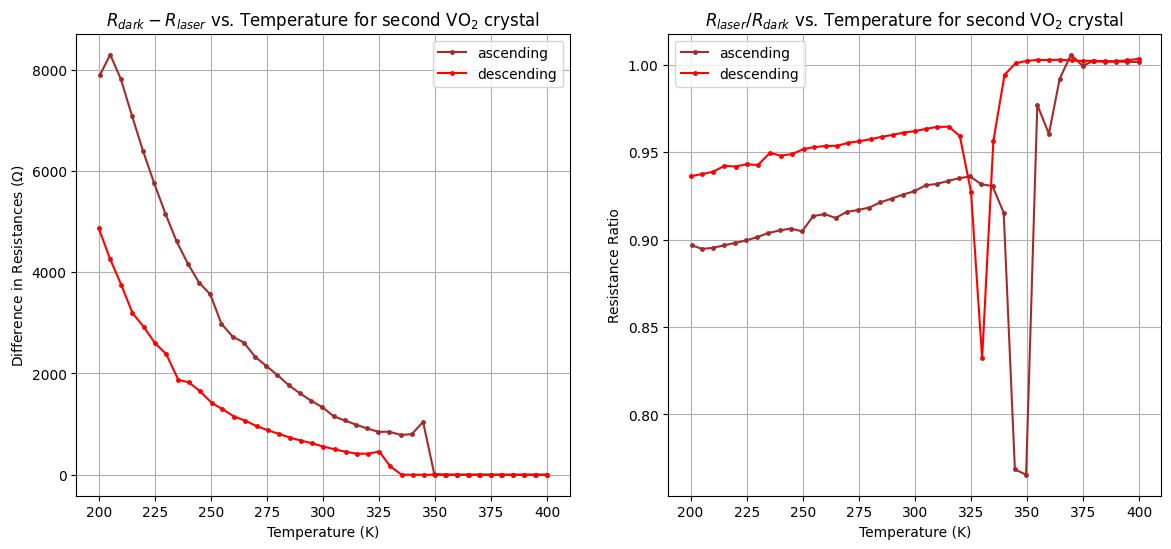

In [10]:
#ASSUMING THE CLOSEST CODE ABOVE HAS BEEN RUN
fig, ax = plt.subplots(ncols=2,figsize=(14,6))

ax[0].plot(ascending_vo2_laserB_2_df["Temperature (K)"],-np.array(ascending_vo2_laserB_2_df["Bridge 2 Resistivity (Ohm)"])+np.array(ascending_vo2_dark_2_df["Bridge 2 Resistivity (Ohm)"]),label="ascending",marker='.',ms=5,color='brown')
ax[0].plot(descending_vo2_laserB_2_df["Temperature (K)"],-np.array(descending_vo2_laserB_2_df["Bridge 2 Resistivity (Ohm)"])+np.array(descending_vo2_dark_2_df["Bridge 2 Resistivity (Ohm)"][1:]),label="descending",marker='.',ms=5,color='red')

ax[1].plot(ascending_vo2_laserB_2_df["Temperature (K)"],np.array(ascending_vo2_laserB_2_df["Bridge 2 Resistivity (Ohm)"])/np.array(ascending_vo2_dark_2_df["Bridge 2 Resistivity (Ohm)"]),label="ascending",marker='.',ms=5,color='brown')
ax[1].plot(descending_vo2_laserB_2_df["Temperature (K)"],np.array(descending_vo2_laserB_2_df["Bridge 2 Resistivity (Ohm)"])/np.array(descending_vo2_dark_2_df["Bridge 2 Resistivity (Ohm)"][1:]),label="descending",marker='.',ms=5,color='red')

for i in [0,1]:
    ax[i].legend()
    ax[i].set_xlabel('Temperature (K)')
    ax[i].grid(visible=True)
ax[0].set_ylabel('Difference in Resistances ($\Omega$)')
ax[1].set_ylabel('Resistance Ratio')
ax[0].set_title('$R_{dark}-R_{laser}$ vs. Temperature for second $\mathrm{VO_2}$ crystal')
ax[1].set_title('$R_{laser}/R_{dark}$ vs. Temperature for second $\mathrm{VO_2}$ crystal')

Then we had some talk about thermal vs photo effect, choppers, time and frequency domains. Du thinks the above is likely not PC, or at least entirely so. We'll have to go to his lab to know. 

If we can't (and we can't) decouple the thermal effect from PC, we can't measure PC.

The rest of the data is going to be more of the same, so we don't graph it here.